In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
recipes_info_df = pd.read_csv('out/recipes_info.csv')

In [4]:
recipes_info_df.head()

,title,year
0,terrina de melón con gelée de oporto,1987
1,mousse de trufa negra '87,1987
2,"ensalada de pasta fresca con caviar, tempura d...",1987
3,"raviolis de cigala, patatas y trufa negra",1987
4,tempura de flor de calabacín rellena de mozzar...,1987


In [5]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [6]:
recipes_data_df.head()

,num_ingredients,num_preparations,num_styles,num_techniques,num_techniquesR,num_worlds,i_consomé de tucuppí,i_anchoas en salazón,i_tamarindo,i_leche de nuez,...,temp_TIBIA/AMBIENTE,temp_FRÍA/AMBIENTE,temp_HELADA/FRÍA/AMBIENTE,temp_CALIENTE/TIBIA,temp_FRÍA/AMBIENTE/HELADA,temp_FRÍA,temp_CALIENTE/FRÍA,temp_FRÍA/HELADA,w_SALADO,w_DULCE
0,7,4,1,8,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0
1,15,5,0,12,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0
2,21,5,0,17,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
3,30,10,1,38,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,25,7,1,21,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
def my_score(f, xs, ys):
    assert(len(xs) == len(ys))
    a = 18
    b = sum(abs(x - y) for x, y in zip(xs, ys)) / len(xs)
    return (f(a) - f(b)) / f(a)

def my_linear_score(xs, ys):
    return my_score(lambda x: x, xs, ys)

In [8]:
clf = RandomForestClassifier(**{
    'class_weight': None,
     'max_depth': None,
     'max_features': 'auto',
     'n_estimators': 1000,
     'n_jobs': -1,
     'random_state': 0
})

In [9]:
%%time

pred_dict = {}
years = recipes_info_df.year.unique()
for year in years[1:]:
    X_train = recipes_data_df[recipes_info_df.year < year]
    y_train = recipes_info_df[recipes_info_df.year < year].year
    X_test = recipes_data_df[recipes_info_df.year == year]
    y_test = recipes_info_df[recipes_info_df.year == year].year
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
#     my_linear_score(y_pred, y_test)
    pred_dict[year] = y_pred

CPU times: user 1min 24s, sys: 3.26 s, total: 1min 27s
Wall time: 41.3 s


In [10]:
perc_dict = {}
# perc_dict[1987] = [0] * 18
for k in pred_dict:
    perc_dict[k] = [list(pred_dict[k]).count(year)*100/len(pred_dict[k]) for year in years[:-1]]

In [11]:
perc_dict

{1988: [100.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1989: [10.714285714285714,
  89.28571428571429,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1990: [0.0,
  37.5,
  62.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1991: [1.7543859649122806,
  24.56140350877193,
  21.05263157894737,
  52.63157894736842,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1992: [0.0,
  0.0,
  5.2631578947368425,
  5.2631578947368425,
  89.47368421052632,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1993: [0.0,
  0.0,
  10.0,
  3.3333333333333335,
  50.0,
  36.666666666666664,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 1994: [0.0,
  3.3333333333333335,
  5.0,
  0.0,
  25.0,
  56.666666666666664,

In [12]:
perc_df = pd.DataFrame(perc_dict, index=years[:-1]).round().T

In [13]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [14]:
perc_df.style.apply(highlight_max, color='darkorange', axis=1)

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2003,2004
1988,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1989,11,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990,0,38,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991,2,25,21,53,0,0,0,0,0,0,0,0,0,0,0,0,0
1992,0,0,5,5,89,0,0,0,0,0,0,0,0,0,0,0,0
1993,0,0,10,3,50,37,0,0,0,0,0,0,0,0,0,0,0
1994,0,3,5,0,25,57,10,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,2,2,2,94,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,2,0,54,45,0,0,0,0,0,0,0,0
1997,0,0,0,0,2,0,2,26,16,54,0,0,0,0,0,0,0


In [15]:
# ax = perc_df.T.plot(
#     figsize=(20, 5),
#     title = 'Percentage of predicted year',
#     marker='.',
# )
# ax.set_xlabel('Predicted year')
# ax.set_ylabel('Percentage');

Text(508.2,0.5,'Predicted year')

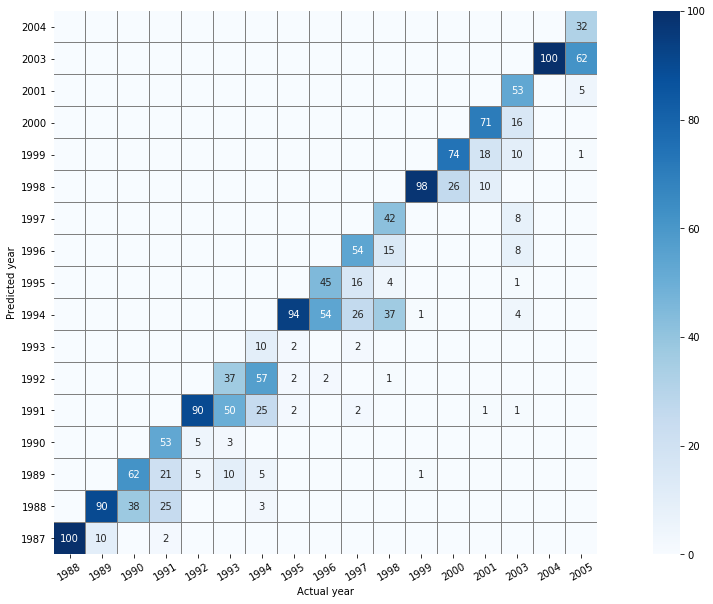

In [19]:
plt.figure(figsize=(20,10))
# fig, ax = plt.subplots()
# fig.set_size_inches((5, 5))
# plt.xlabel('Predicted year')
# plt.ylabel('Tested year')
# plt.title('Year prediction', fontsize=20)
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
perc_df[1987][1989]=10
perc_df[1988][1989]=90
perc_df[1991][1992]=90
ax = sns.heatmap(perc_df.T, annot=True, fmt='.0f', square=True, cmap='Blues', mask=perc_df.T == 0, linewidths=0.01, linecolor='gray')
ax = sns.heatmap(perc_df.T, annot=False, fmt='.0f', square=True, cmap='Blues', mask=perc_df.T > 0, linewidths=0.01, linecolor='gray', cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel('Actual year')#, fontsize=12)
ax.set_ylabel('Predicted year')#, fontsize=12);

In [17]:
for x in range(1988, 2006):
    if x != 2002:
        print(x, perc_df.T[x].sum())

1988 100.0
1989 100.0
1990 100.0
1991 101.0
1992 100.0
1993 100.0
1994 100.0
1995 100.0
1996 101.0
1997 100.0
1998 99.0
1999 100.0
2000 100.0
2001 100.0
2003 101.0
2004 100.0
2005 100.0


In [18]:
set([1,2,3]) > [1,2,3]

TypeError: unorderable types: set() > list()

In [ ]:
sorted()